# Hierarchical Clustering (Crime)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import normalize

In [12]:
crime=pd.read_csv('crime_data.csv')


In [13]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [14]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [15]:
crime2=crime.drop(['Unnamed: 0'],axis=1)
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [16]:
# Normalize heterogenous numerical data 

crime2=pd.DataFrame(normalize(crime2),columns=crime2.columns)
crime2

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


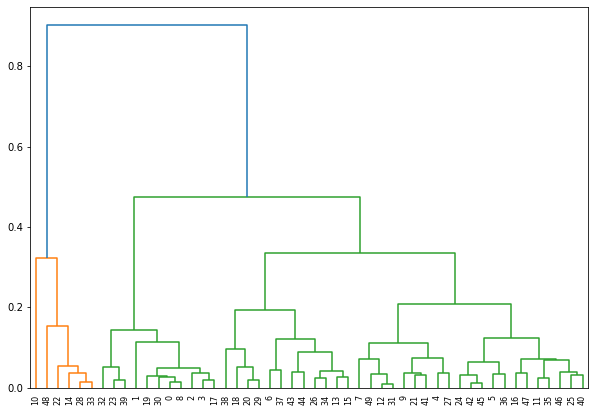

In [17]:
# Create Dendrograms
plt.figure(figsize=(10,7))
dendrogram=sch.dendrogram(sch.linkage(crime2,'complete'))

In [18]:
#Create Clusters(y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [19]:
y=pd.DataFrame(hclusters.fit_predict(crime2),columns=['clustersid'])
y['clustersid'].value_counts()

0    20
3    12
1    12
2     5
4     1
Name: clustersid, dtype: int64

In [20]:
crime2['clustersid']=hclusters.labels_
crime2

,Murder,Assault,UrbanPop,Rape,clustersid
0,0.054031,0.966016,0.237411,0.086778,0
1,0.036872,0.969739,0.176987,0.164081,0
2,0.026439,0.959624,0.261122,0.101185,0
3,0.044528,0.961392,0.252998,0.098669,0
4,0.030657,0.940134,0.309972,0.138295,0
5,0.035594,0.919142,0.351437,0.174367,3
6,0.024486,0.816202,0.571341,0.082362,1
7,0.023674,0.954965,0.288897,0.063397,0
8,0.044478,0.967547,0.231056,0.092134,0
9,0.078534,0.952332,0.270805,0.116446,0


In [21]:
crime2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,0.045019,0.958570,0.252999,0.102582
1,1,0.035272,0.845448,0.515796,0.120321
2,2,0.024747,0.692244,0.707394,0.130090
3,3,0.044328,0.902815,0.403400,0.134434
4,4,0.054546,0.473419,0.854213,0.207893


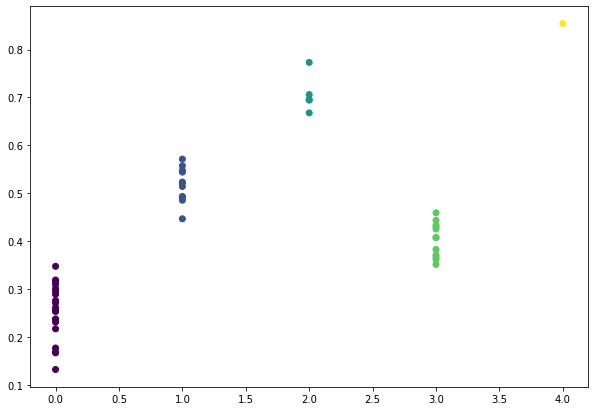

In [22]:
# plot clusters

plt.figure(figsize=(10,7))
plt.scatter(crime2['clustersid'],crime2['UrbanPop'],c=hclusters.labels_)

In [23]:
# K-Means Clustering(Crime)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

In [24]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [25]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Murder      50 non-null     float64
 1   Assault     50 non-null     float64
 2   UrbanPop    50 non-null     float64
 3   Rape        50 non-null     float64
 4   clustersid  50 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [26]:
# Normalize heterogenous numerical data by using Standard Scaler

crime2_norm=StandardScaler().fit_transform(crime2)

In [27]:
# within-cluster sum-of-squares criterion

vcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime2_norm)
    vcss.append(kmeans.inertia_)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


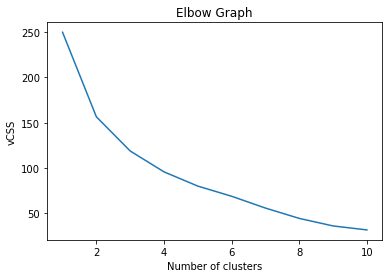

In [28]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),vcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('vCSS')
plt.show()

In [29]:
# Build Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(crime2_norm)
clusters4

KMeans(n_clusters=4, random_state=30)

In [30]:
clusters4.labels_

array([1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 2, 3, 1, 0, 2, 0, 3, 1, 0, 1, 0, 1,
       2, 1, 3, 3, 0, 1, 2, 0, 1, 1, 1, 2, 0, 3, 3, 0, 0, 1, 3, 1, 3, 0,
       0, 3, 3, 3, 2, 1])

In [31]:
# Assign clusters to the data set

crime4=crime2.copy()
crime4['clusters4id']=clusters4.labels_
crime4

,Murder,Assault,UrbanPop,Rape,clustersid,clusters4id
0,0.054031,0.966016,0.237411,0.086778,0,1
1,0.036872,0.969739,0.176987,0.164081,0,1
2,0.026439,0.959624,0.261122,0.101185,0,1
3,0.044528,0.961392,0.252998,0.098669,0,1
4,0.030657,0.940134,0.309972,0.138295,0,1
5,0.035594,0.919142,0.351437,0.174367,3,3
6,0.024486,0.816202,0.571341,0.082362,1,0
7,0.023674,0.954965,0.288897,0.063397,0,1
8,0.044478,0.967547,0.231056,0.092134,0,1
9,0.078534,0.952332,0.270805,0.116446,0,1


In [33]:
# Compute the centroids for K=4 clusters with 4 variables

clusters4.cluster_centers_

array([[-0.36359536, -0.36031362,  0.6423923 ,  0.02777487, -0.1907889 ],
       [ 0.29206612,  0.76389844, -0.94775012, -0.47497502, -0.98574265],
       [-0.73743012, -2.24530336,  1.94977967,  0.67217261,  0.86914943],
       [ 0.24553356,  0.20980123, -0.03769861,  0.42776387,  1.3991186 ]])

In [34]:
# Group data by Clusters (K=4)

crime4.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Murder,Assault,UrbanPop,Rape,clustersid
,,mean,mean,mean,mean,mean
0,0,0.035272,0.845448,0.515796,0.120321,1.000000
1,1,0.045019,0.958570,0.252999,0.102582,0.000000
2,2,0.029714,0.655773,0.731864,0.143057,2.333333
3,3,0.044328,0.902815,0.403400,0.134434,3.000000


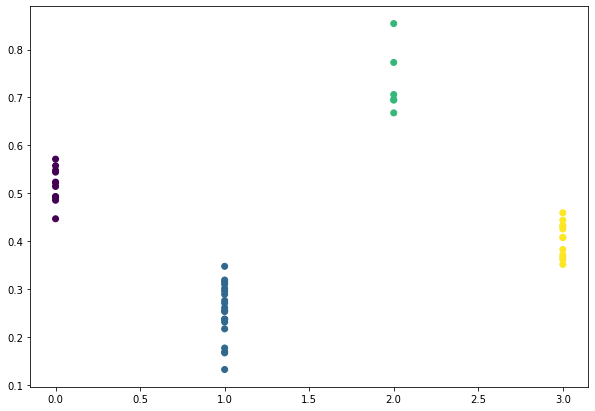

In [35]:
# plot clusters

plt.figure(figsize=(10,7))
plt.scatter(crime4['clusters4id'],crime4['UrbanPop'], c=clusters4.labels_)

In [36]:
# Build Cluster algorithm using K=5

In [37]:
clusters5=KMeans(5,random_state=30).fit(crime2_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [38]:
clusters5.labels_

array([1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 4, 3, 1, 2, 4, 2, 3, 1, 0, 1, 0, 1,
       4, 1, 3, 3, 2, 2, 4, 2, 1, 1, 1, 4, 2, 3, 3, 2, 0, 1, 3, 1, 3, 2,
       2, 3, 3, 3, 4, 1])

In [39]:
# Assign clusters to the data set

crime5=crime2.copy()
crime5['clusters5id']=clusters5.labels_
crime5

,Murder,Assault,UrbanPop,Rape,clustersid,clusters5id
0,0.054031,0.966016,0.237411,0.086778,0,1
1,0.036872,0.969739,0.176987,0.164081,0,1
2,0.026439,0.959624,0.261122,0.101185,0,1
3,0.044528,0.961392,0.252998,0.098669,0,1
4,0.030657,0.940134,0.309972,0.138295,0,1
5,0.035594,0.919142,0.351437,0.174367,3,3
6,0.024486,0.816202,0.571341,0.082362,1,0
7,0.023674,0.954965,0.288897,0.063397,0,1
8,0.044478,0.967547,0.231056,0.092134,0,1
9,0.078534,0.952332,0.270805,0.116446,0,1


In [40]:
# Compute the centroids for K=5 clusters with 4 variables

clusters5.cluster_centers_

array([[-1.24022291, -0.2574299 ,  0.59664368, -1.2613695 , -0.1907889 ],
       [ 0.29085022,  0.77517841, -0.96309409, -0.57709337, -0.98574265],
       [ 0.10143505, -0.30494053,  0.51843537,  0.76045   , -0.27911709],
       [ 0.24553356,  0.20980123, -0.03769861,  0.42776387,  1.3991186 ],
       [-0.73743012, -2.24530336,  1.94977967,  0.67217261,  0.86914943]])

In [41]:
# Group data by Clusters (K=5)

crime5.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Murder,Assault,UrbanPop,Rape,clustersid
,,mean,mean,mean,mean,mean
0,0,0.022239,0.855800,0.508236,0.074835,1.000000
1,1,0.045001,0.959705,0.250463,0.098979,0.000000
2,2,0.042185,0.851020,0.495310,0.146172,0.888889
3,3,0.044328,0.902815,0.403400,0.134434,3.000000
4,4,0.029714,0.655773,0.731864,0.143057,2.333333


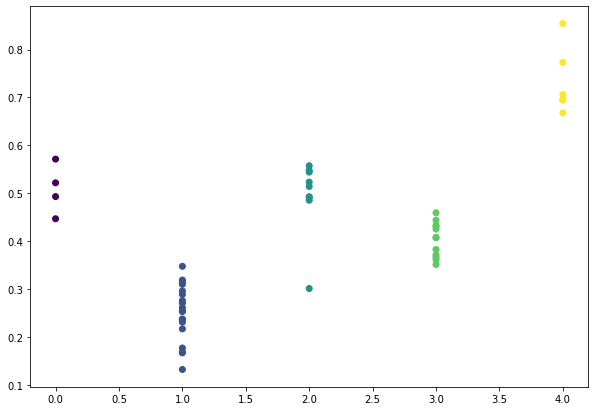

In [42]:
# Plot Clusters

plt.figure(figsize=(10,7))
plt.scatter(crime5['clusters5id'],crime5['UrbanPop'], c=clusters5.labels_)


In [43]:
#DBSCAN Clustering (crime)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [44]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [45]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [47]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [48]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [49]:
# DBSCAN clustering

dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)


DBSCAN(eps=1, min_samples=4)

In [50]:
# Adding clusters to dataset

crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [51]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


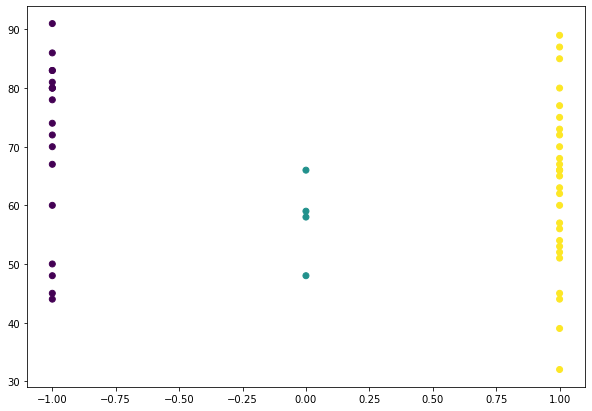

In [52]:
# plot clusters

plt.figure(figsize=(10,7))
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_)